In [ ]:
# 1
a = [1, 2, 3, 4, 5]
b = a[::-1]
print(b)

[5, 4, 3, 2, 1]


In [ ]:
# 2
b = [elem for elem in a if elem % 2==0]
print(b)

[2, 4]


In [ ]:
# 3
b = [2 * elem for elem in a]
print(b)

[2, 4, 6, 8, 10]


In [ ]:
# 4
b = [elem * 4/3 for elem in a]
print(b)

[1.3333333333333333, 2.6666666666666665, 4.0, 5.333333333333333, 6.666666666666667]


In [ ]:
# 4
st = 'abvgd'
print(max([ord(elem) for elem in st]))

118


In [ ]:
# 5
st_list = [(i, ord(st[i])) for i in range(len(st))]
print(st_list)

[(97, 0), (98, 1), (118, 2), (103, 3), (100, 4)]


In [ ]:
# 6
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr)
print(arr.sum(axis=0))
print(arr.sum(axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[12 15 18]
[ 6 15 24]


In [ ]:
# 7
import numpy as np

n = 10
k = 12
A = np.ones(n)
I = np.random.randint(0,n,k)
print(I)
A[I] += 1
print(A)
'''
np.add.at(A, I, 1)
print(A)
'''

[1 6 1 3 5 0 3 1 6 6 2 4]
[2. 2. 2. 2. 2. 2. 2. 1. 1. 1.]


'\nnp.add.at(A, I, 1)\nprint(A)\n'

In [ ]:
# 8
import pandas as pd

df = pd.read_csv('Star3642_balanced.csv')
print(df.dtypes)

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object


In [ ]:
count_missing_values = df.isna().sum()

print(count_missing_values)

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64


1821


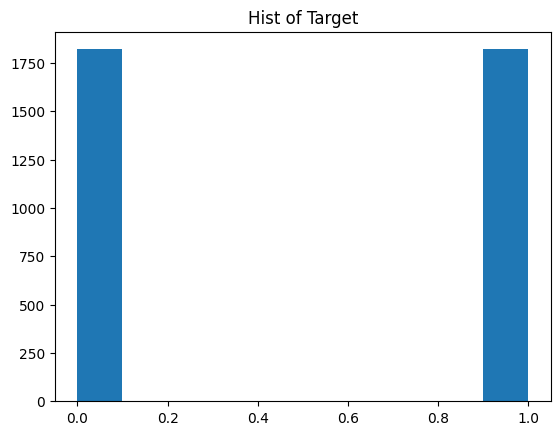

In [ ]:
import matplotlib.pyplot as plt

nw = df[df['TargetClass']==1]
print(nw.shape[0])
plt.hist(df['TargetClass'])
plt.title(label = 'Hist of Target')
plt.show()

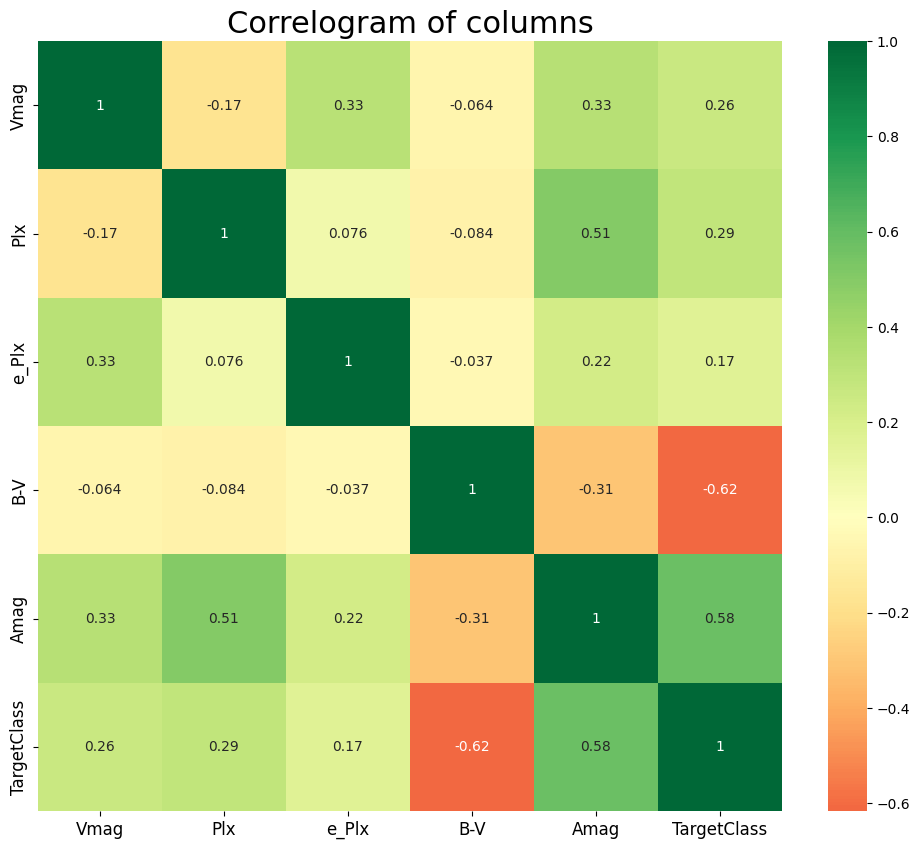

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only = True), xticklabels=df.corr(numeric_only = True).columns, yticklabels=df.corr(numeric_only = True).columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of columns', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1000x800 with 0 Axes>

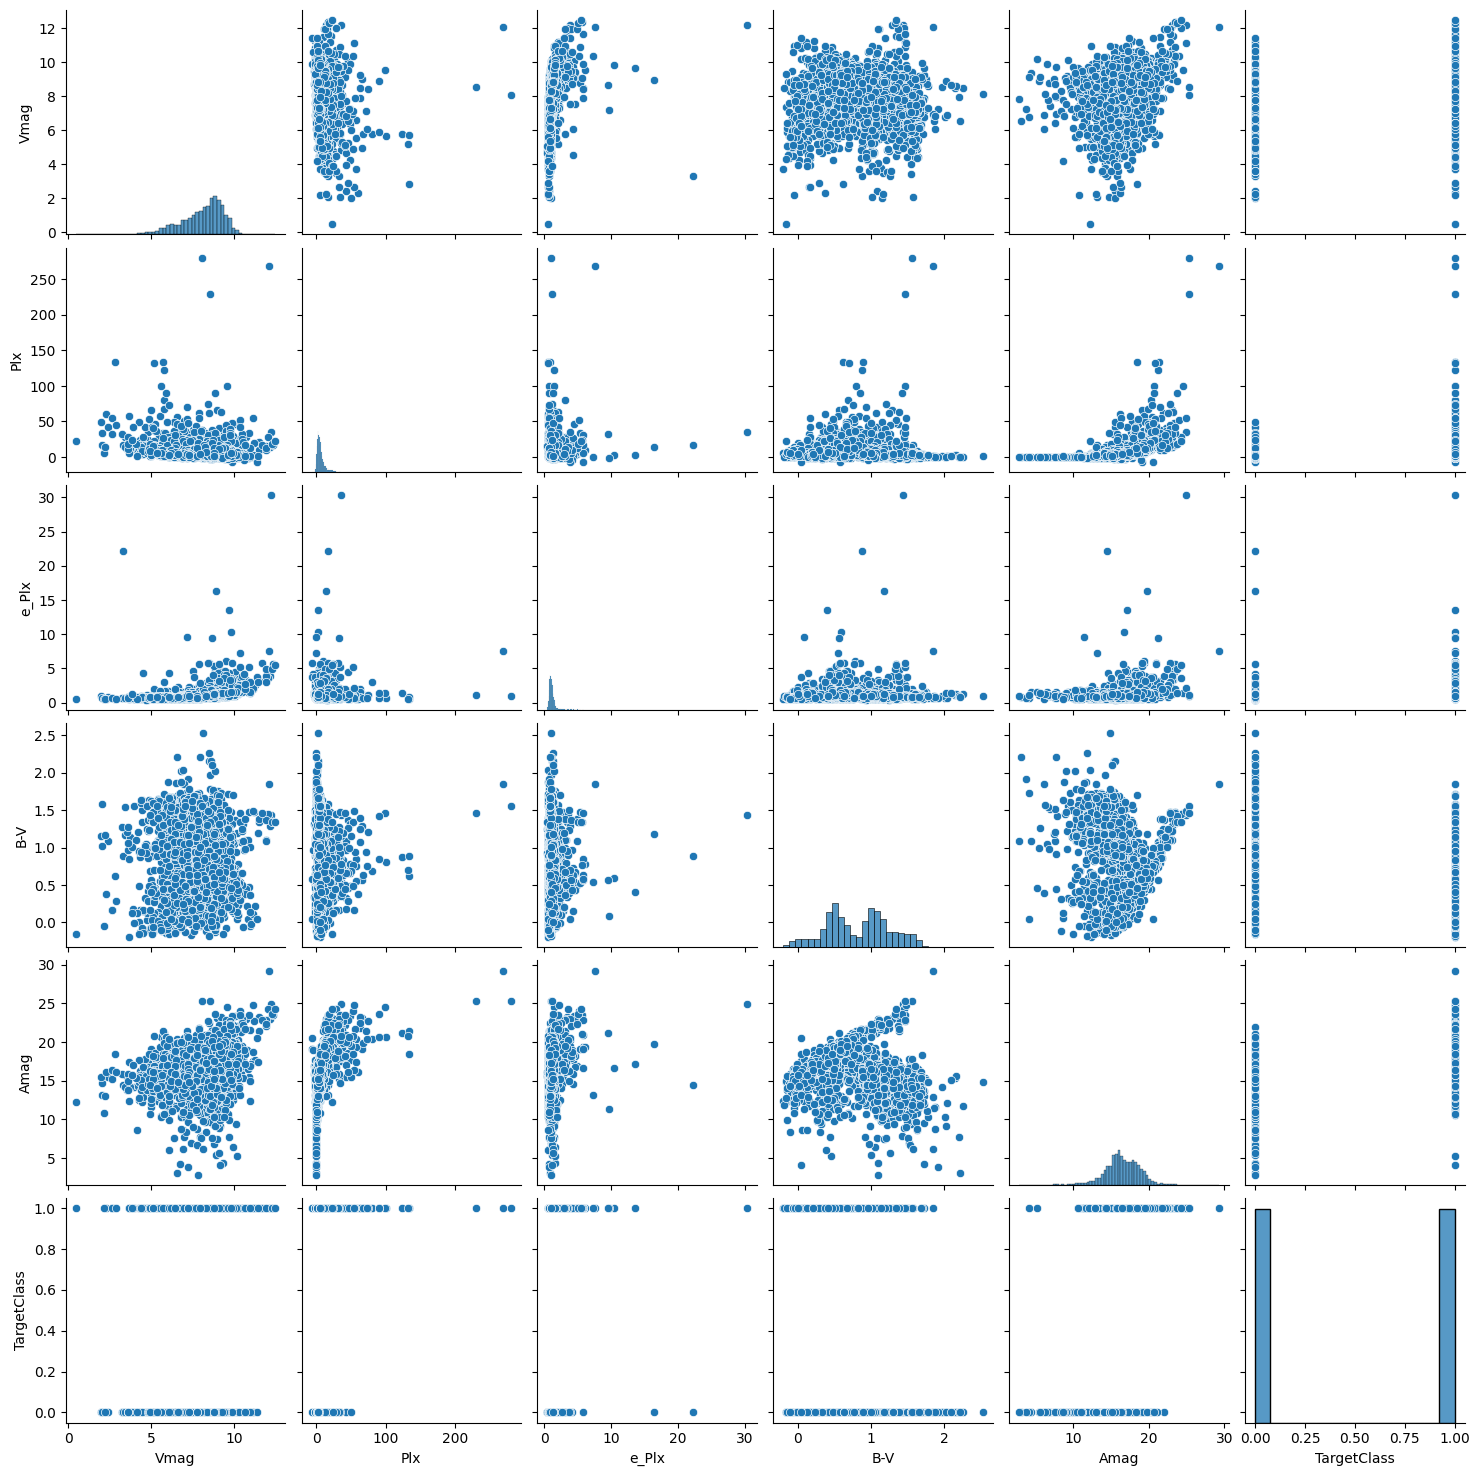

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

Выбросы Vmag: 
 21     4.83
128    4.34
172    3.99
208    0.45
210    2.40
Name: Vmag, dtype: float64
Выбросы Plx: 
 21     35.33
23     22.42
43     29.58
57    100.24
74     26.92
Name: Plx, dtype: float64
Выбросы e_Plx: 
 15     2.45
53     1.96
81     2.39
93     2.28
158    1.92
Name: e_Plx, dtype: float64
Выбросы B-V: 
 396     2.155
641     2.266
1164    2.157
1254    2.210
1333    2.215
Name: B-V, dtype: float64
Выбросы Amag: 
 33      9.539717
34     10.621097
47      9.335489
66      9.205907
157    10.646950
Name: Amag, dtype: float64
Выбросы TargetClass: 
 Series([], Name: TargetClass, dtype: int64)


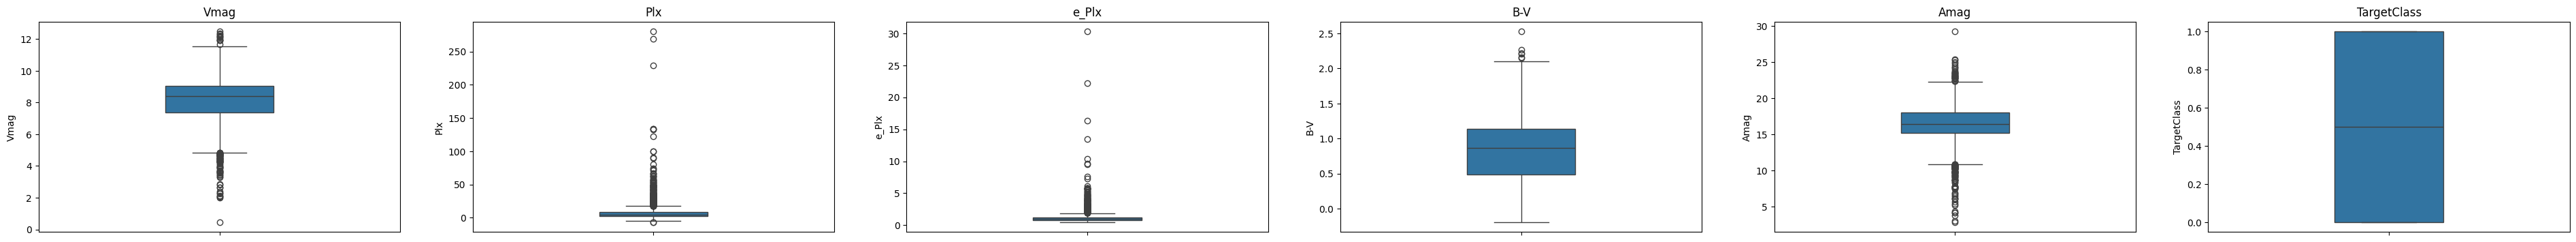

In [ ]:
keys = ['Vmag', 'Plx','e_Plx','B-V', 'Amag', 'TargetClass']
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)

for ax, key in zip(axes, keys):
  sns.boxplot(df[key], ax=ax, width=0.3)
  ax.set_title(key)
  Q1 =  df[key].quantile(0.25)
  Q3 = df[key].quantile(0.75)
  IQR = Q3 - Q1

  print(f'Выбросы {key}: \n {df[(df[key] < Q1-1.5*IQR ) | (df[key]> Q3+1.5*IQR)][key].head()}')

plt.show()

In [ ]:
agg_func = {'Vmag':['mean', 'max', 'min', 'median'],
             'Plx':['mean', 'max', 'min', 'median'],
             'B-V':['mean', 'max', 'min', 'median'],
             'Amag':['mean', 'max', 'min', 'median'],
             'Vmag':['mean', 'max', 'min', 'median']}
select = df.groupby("TargetClass").agg(agg_func)
print(select)

                 Vmag                     Plx                     B-V        \
                 mean    max   min       mean     max   min      mean   max   
TargetClass                                                                   
0            7.766546  11.42  2.01   4.098380   49.48 -6.63  1.096238  2.53   
1            8.474514  12.49  0.45  11.113926  280.27 -6.82  0.557915  1.85   

                         Amag                   
               min       mean        max   min  
TargetClass                                     
0           -0.154  15.020683  21.997383  2.82  
1           -0.196  17.834092  29.249165  4.14  


In [ ]:
pd.set_option('display.max_rows', None)
import pandas as pd

df = pd.read_csv('Star3642_balanced.csv')
df['SpType'] = df['SpType'].str.split('/')
df = df.explode("SpType")
Sp_df = df.groupby('SpType').agg({'Plx': 'count'}).reset_index()
Sp_df.rename(columns={'Plx': 'Count'}, inplace=True)


print(Sp_df)

           SpType  Count
0         1III +G      1
1         1V (+K)      1
2        2III: +F      1
3         5V + F0      1
4          8V + G      1
5              A0      1
6           A0:Ia      1
7            A0II      1
8           A0III      3
9            A0IV      2
10           A0Ia      1
11          A0Ia0      1
12          A0Ia:      2
13          A0Iab      2
14           A0Ib      2
15            A0V     17
16           A0Vn      2
17          A0Vnn      2
18           A0Vs      1
19             A1      1
20          A1III      1
21           A1IV      1
22           A1Ia      2
23          A1Iab      1
24            A1V     17
25           A1Vn      3
26           A1Vs      1
27         A1Vvar      1
28             A2      3
29          A2III      4
30           A2IV      5
31            A2V     16
32          A2Vnn      1
33           A2Vs      1
34             A3      1
35           A3II      2
36          A3III      9
37           A3IV      4
38            A3V     20
